### Evaluating East Africa Model

In [20]:
!python evaluation_region.py --spectral 0 --scale 0 --region EastAfrica --batch_size 8 --model_path "\\tests\\region\\east africa\\baseline\\ClimODE_region_EastAfrica_euler_0_model_80.pt"

^C


c:\Users\robot\anaconda3\envs\climode_env\lib\site-packages\xarray\groupers.py:326: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(
c:\Users\robot\anaconda3\envs\climode_env\lib\site-packages\xarray\core\indexes.py:561: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  flat_indexer = index.get_indexer(flat_labels, method=method, tolerance=tolerance)
c:\Users\robot\anaconda3\envs\climode_env\lib\site-packages\xarray\groupers.py:326: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(
c:\Users\robot\anaconda3\envs\climode_env\lib\site-packages\xarray\core\indexes.py:561: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  flat_indexer = index.get_indexer(flat_labels, method=method, tolerance=tolerance)
c:\Users\rob

############################ Data is loading ###########################
['c:\\Users\\robot\\Desktop\\CMU Africa\\Fall 2024\\Introduction to Deep Learning\\Research Project\\ClimODE/era5_data/geopotential_500/*.nc', 'c:\\Users\\robot\\Desktop\\CMU Africa\\Fall 2024\\Introduction to Deep Learning\\Research Project\\ClimODE/era5_data/temperature_850/*.nc', 'c:\\Users\\robot\\Desktop\\CMU Africa\\Fall 2024\\Introduction to Deep Learning\\Research Project\\ClimODE/era5_data/2m_temperature/*.nc', 'c:\\Users\\robot\\Desktop\\CMU Africa\\Fall 2024\\Introduction to Deep Learning\\Research Project\\ClimODE/era5_data/10m_u_component_of_wind/*.nc', 'c:\\Users\\robot\\Desktop\\CMU Africa\\Fall 2024\\Introduction to Deep Learning\\Research Project\\ClimODE/era5_data/10m_v_component_of_wind/*.nc']
Length of training data 1460
Length of validation data 1460
Length of testing data 1460
ClimODE_uncertain_region(
  (vel_f): Climate_ResNet_2D(
    (layer_cnn): ModuleList(
      (0): Sequential(
        (

In [1]:
!python evaluation_region_seresnet.py --spectral 0 --scale 0 --region EastAfrica --batch_size 8 --model_path "\\tests\\region\\east africa\\se resnet\\ClimODE_region_EastAfrica_euler_0_model_35.pt"

^C


c:\Users\robot\anaconda3\envs\climode_env\lib\site-packages\xarray\groupers.py:326: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(
c:\Users\robot\anaconda3\envs\climode_env\lib\site-packages\xarray\core\indexes.py:561: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  flat_indexer = index.get_indexer(flat_labels, method=method, tolerance=tolerance)
c:\Users\robot\anaconda3\envs\climode_env\lib\site-packages\xarray\groupers.py:326: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(
c:\Users\robot\anaconda3\envs\climode_env\lib\site-packages\xarray\core\indexes.py:561: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  flat_indexer = index.get_indexer(flat_labels, method=method, tolerance=tolerance)
c:\Users\rob

############################ Data is loading ###########################
['c:\\Users\\robot\\Desktop\\CMU Africa\\Fall 2024\\Introduction to Deep Learning\\Research Project\\ClimODE/era5_data/geopotential_500/*.nc', 'c:\\Users\\robot\\Desktop\\CMU Africa\\Fall 2024\\Introduction to Deep Learning\\Research Project\\ClimODE/era5_data/temperature_850/*.nc', 'c:\\Users\\robot\\Desktop\\CMU Africa\\Fall 2024\\Introduction to Deep Learning\\Research Project\\ClimODE/era5_data/2m_temperature/*.nc', 'c:\\Users\\robot\\Desktop\\CMU Africa\\Fall 2024\\Introduction to Deep Learning\\Research Project\\ClimODE/era5_data/10m_u_component_of_wind/*.nc', 'c:\\Users\\robot\\Desktop\\CMU Africa\\Fall 2024\\Introduction to Deep Learning\\Research Project\\ClimODE/era5_data/10m_v_component_of_wind/*.nc']
Length of training data 1460
Length of validation data 1460
Length of testing data 1460
ClimODE_uncertain_region_SEResNet(
  (vel_f): Climate_SEResNet_2D(
    (layer_cnn): ModuleList(
      (0): Sequential

### Evaluating se resnet

In [ ]:
!python evaluation_region_seresnet.py --spectral 0 --scale 0 --region EastAfrica --batch_size 8 --model_path "\\tests\\region\\east africa\\se resnet\\ClimODE_region_EastAfrica_euler_0_model_.pt"

### Evaluating global context block

In [ ]:
!python evaluation_region_gcb.py --spectral 0 --scale 0 --region EastAfrica --batch_size 8 --model_path "\\tests\\region\\east africa\\global_context_block\\ClimODE_region_EastAfrica_euler_0_model_.pt"

### Evaluating Coordinate attention architecture

In [ ]:
!python evaluation_region_coord_att.py --spectral 0 --scale 0 --region EastAfrica --batch_size 8 --model_path "\\tests\\region\\east africa\\coordinate attention block\\ClimODE_region_EastAfrica_euler_0_model_.pt"

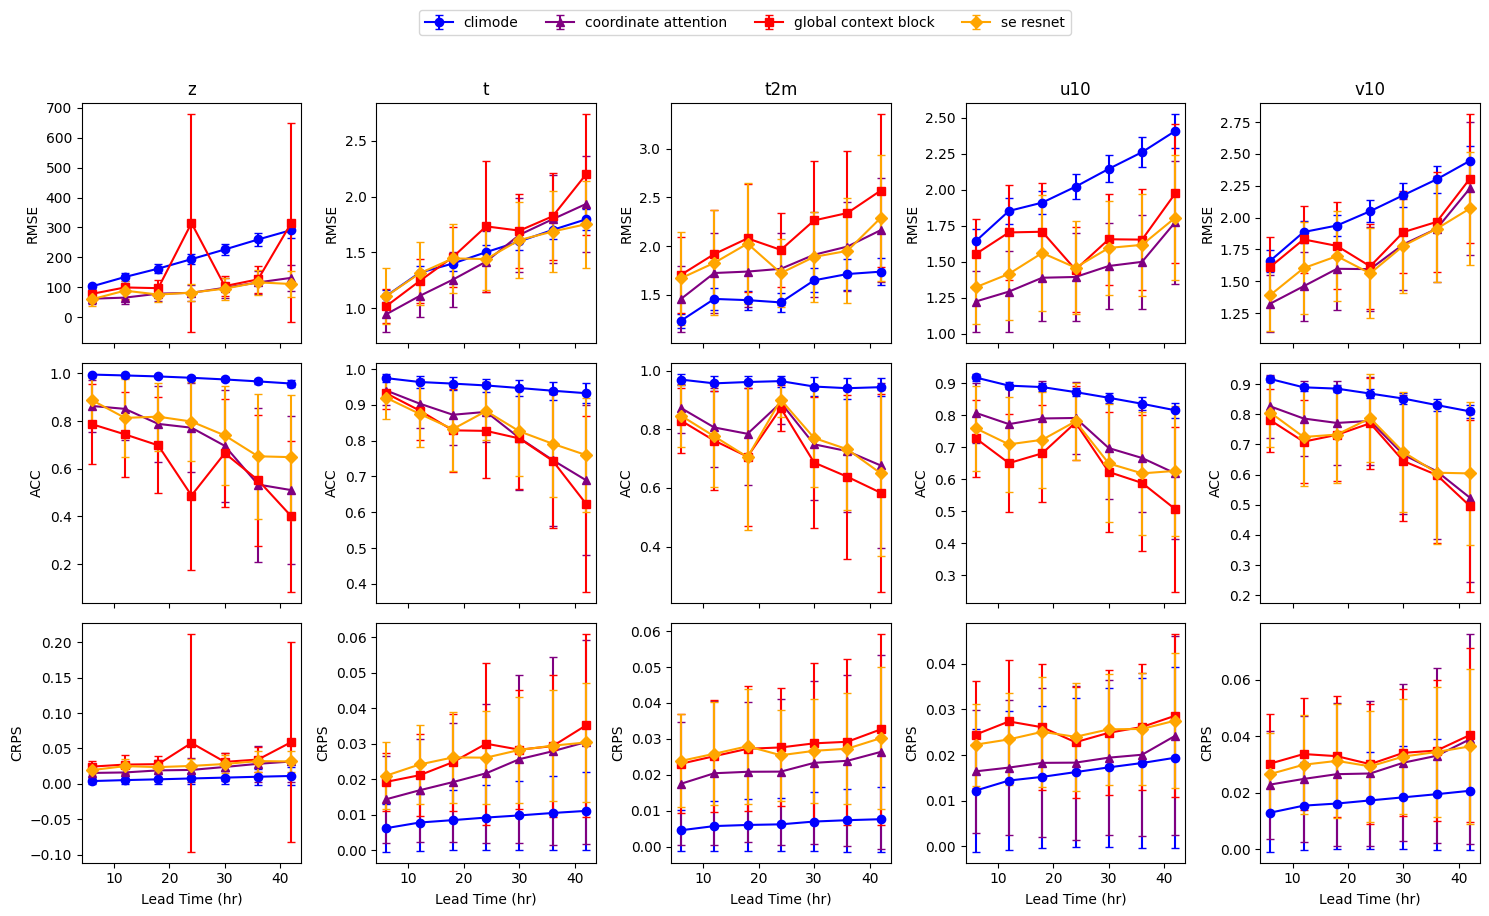

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Helper function to plot RMSE, ACC, and CRPS for a given dataset
def plot_metrics(data, model_name, ax_rmse, ax_acc, ax_crps, color, marker):
    observables = data['Observable'].unique()
    lead_times = sorted(data['Lead Time (hours)'].unique())

    for i, obs in enumerate(observables):
        obs_data = data[data['Observable'] == obs]
        # Plot RMSE
        ax_rmse[i].errorbar(
            lead_times, obs_data['Mean RMSD'], yerr=obs_data['Std RMSD'],
            label=model_name, color=color, marker=marker, capsize=3
        )
        # Plot ACC
        ax_acc[i].errorbar(
            lead_times, obs_data['Mean ACC'], yerr=obs_data['Std ACC'],
            label=model_name, color=color, marker=marker, capsize=3
        )
        # Plot CRPS
        ax_crps[i].errorbar(
            lead_times, obs_data['Mean CRPS'], yerr=obs_data['Std CRPS'],
            label=model_name, color=color, marker=marker, capsize=3
        )

# Function to load data for each model and plot RMSE, ACC, and CRPS
def load_and_plot(csv_files, model_names, colors, markers, ax_rmse, ax_acc, ax_crps):
    for model_name, file_path in zip(model_names, csv_files):
        # Load the dataset
        data = pd.read_csv(file_path)
        # Plot RMSE, ACC, and CRPS for the dataset
        plot_metrics(data, model_name, ax_rmse, ax_acc, ax_crps, colors[model_name], markers[model_name])

# Paths to CSV files for NODE, ClimaX, FCN, and ClimODE
csv_files = [
    "./evaluations/evaluation_metrics_baseline.csv",    # Replace with the actual file path for NODE
    "./evaluations/evaluation_metrics_c_att.csv",      # Replace with the actual file path for ClimaX
    "./evaluations/evaluation_metrics_gcb.csv",        # Replace with the actual file path for FCN
    "./evaluations/evaluation_metrics_seresnet.csv"    # Replace with the actual file path for ClimODE
]

# Model names and properties
model_names = ["climode", "coordinate attention", "global context block", "se resnet"]
model_colors = {"climode": "blue", "coordinate attention": "purple", "global context block": "red", "se resnet": "orange"}
model_markers = {"climode": "o", "coordinate attention": "^", "global context block": "s", "se resnet": "D"}

# Prepare subplots for RMSE, ACC, and CRPS
n_obs = 5  # Number of observables (z, t, t2m, u10, v10)
fig, axes = plt.subplots(3, n_obs, figsize=(15, 9), sharex=True)

# Load data for each model and plot
load_and_plot(csv_files, model_names, model_colors, model_markers, axes[0], axes[1], axes[2])

# Add titles, labels, and legends
observables = ['z', 't', 't2m', 'u10', 'v10']  # Observable variables
for i, obs in enumerate(observables):
    axes[0][i].set_title(obs)
    axes[0][i].set_ylabel('RMSE')
    axes[1][i].set_ylabel('ACC')
    axes[2][i].set_ylabel('CRPS')
    axes[2][i].set_xlabel('Lead Time (hr)')

# Set shared legend
handles, labels = axes[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(model_colors), bbox_to_anchor=(0.5, 1.02))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
